# 1. Prescription Problem Statement

The opioid epidemic in the United States was recently declared a national emergency as it affects a broad demographic of men and women with no evidence of abating. The problem is believed to have begun as a result of overprescribing powerful opioids starting in the 1990s to treat chronic pain. The number of Americans dying from opioid overdose has increased roughly four-fold over a 15 year period (1999 – 2014). Despite the high prevalence of substance use disorders among patients in various medical care settings, health care professionals do not routinely screen for substance use disorders, even though these patients are at higher risk for development of chronic medical illnesses and potentially fatal medication interactions (1). Identifying medical specialties and prescriber characteristics associated with a high rate of opioid prescriptions would identify potential target patient populations for public health education and health care settings that can implement new medical guidelines to help stem the rise in substance use disorders and overdoses.

The Centers for Medicare & Medicaid Services (CMS) released a public dataset, the Part D Prescriber Public Use File with information on prescription drug events incurred by Medicare beneficiaries with a Part D prescription drug plan. The dataset covers calendar year 2015 and contains beneficiary counts, claim counts, drug names, drug costs, and provider’s unique identifier, practice location, and medical specialty. Supplementary and summary tables additionally provide additional provider demographics, claim counts and drug costs by plan type, opioid or other drug classes, and beneficiary age and race counts.

While this data can help provide insights into opioid prescriber characteristics, results may not be generalizable to all medical professionals within the United States. CMS provide prescriptions made for patients 65 years of age or older and is limited to those enrolled in the Medicare Part D prescription drug program, which is ~70% of all Medicare beneficiaries. Prescriber behavior may differ for patients younger than 65 years of age and/or for patients with private insurance plans. Data are also limited to a single calendar year, which will not detect changes in provider behavior due to the recognition of the opioid epidemic.

(1) “Facing Addition in America” The Surgeon General’s Report on Alcohol, Drugs, and Health (2016) U.S. Department of Health & Human Services

In [1]:
import pandas as pd
# Part D Prescriber Public Use File
df_puf = pd.read_csv("../unit-4_project/PartD_Prescriber_PUF_NPI_Drug_15.txt", sep='\t')
df_puf.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1912175340,&H'S)U,&E'K:(A:I,SAN JUAN BAUTISTA,CA,General Surgery,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,15.0,...,15.0,213,186.85,NaN,#,NaN,#,NaN,NaN,NaN
1,1912175340,&H'S)U,&E'K:(A:I,SAN JUAN BAUTISTA,CA,General Surgery,S,IBUPROFEN,IBUPROFEN,20.0,...,21.0,305,114.18,NaN,#,NaN,#,NaN,NaN,NaN
2,1912175340,&H'S)U,&E'K:(A:I,SAN JUAN BAUTISTA,CA,General Surgery,S,METOCLOPRAMIDE HCL,METOCLOPRAMIDE HCL,30.0,...,34.0,244,117.93,NaN,#,NaN,#,NaN,NaN,NaN
3,1417051921,A,N,CATOOSA,OK,Physician Assistant,S,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,17.0,...,17.0,44,57.64,NaN,*,NaN,*,NaN,NaN,NaN
4,1417051921,A,N,CATOOSA,OK,Physician Assistant,S,AZITHROMYCIN,AZITHROMYCIN,44.0,...,44.0,219,305.91,33.0,NaN,33.0,NaN,33.0,164.0,243.85


In [2]:
# Drop columns not likely to be necessary for analysis
df_puf.drop(['nppes_provider_last_org_name', 'nppes_provider_first_name'], axis=1, inplace=True)

# Rename column names that are also in the demographics file, but may differ in values
df_puf.rename(columns={'bene_count':'puf_bene_count', 'total_claim_count':'puf_total_claim_count', 'total_30_day_fill_count':'puf_total_30_day_fill_count','total_drug_cost':'puf_total_drug_cost','total_day_supply':'puf_total_day_supply','bene_count_ge65':'puf_bene_count_ge65','bene_count_ge65_suppress_flag':'puf_bene_count_ge65_suppress_flag','total_claim_count_ge65':'puf_total_claim_count_ge65','ge65_suppress_flag':'puf_ge65_suppress_flag','total_30_day_fill_count_ge65':'puf_total_30_day_fill_count_ge65','total_day_supply_ge65':'puf_total_day_supply_ge65','total_drug_cost_ge65':'puf_total_drug_cost_ge65'}, inplace=True)

df_puf.head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,puf_bene_count,puf_total_claim_count,puf_total_30_day_fill_count,puf_total_day_supply,puf_total_drug_cost,puf_bene_count_ge65,puf_bene_count_ge65_suppress_flag,puf_total_claim_count_ge65,puf_ge65_suppress_flag,puf_total_30_day_fill_count_ge65,puf_total_day_supply_ge65,puf_total_drug_cost_ge65
0,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,15.0,15,15.0,213,186.85,NaN,#,NaN,#,NaN,NaN,NaN
1,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,S,IBUPROFEN,IBUPROFEN,20.0,21,21.0,305,114.18,NaN,#,NaN,#,NaN,NaN,NaN
2,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,S,METOCLOPRAMIDE HCL,METOCLOPRAMIDE HCL,30.0,34,34.0,244,117.93,NaN,#,NaN,#,NaN,NaN,NaN
3,1417051921,CATOOSA,OK,Physician Assistant,S,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,17.0,17,17.0,44,57.64,NaN,*,NaN,*,NaN,NaN,NaN
4,1417051921,CATOOSA,OK,Physician Assistant,S,AZITHROMYCIN,AZITHROMYCIN,44.0,44,44.0,219,305.91,33.0,NaN,33.0,NaN,33.0,164.0,243.85


In [3]:
# Explore DataFrame shape and basic info on all columns
print df_puf.shape
df_puf.info()

(24525869, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24525869 entries, 0 to 24525868
Data columns (total 19 columns):
npi                                  int64
nppes_provider_city                  object
nppes_provider_state                 object
specialty_description                object
description_flag                     object
drug_name                            object
generic_name                         object
puf_bene_count                       float64
puf_total_claim_count                int64
puf_total_30_day_fill_count          float64
puf_total_day_supply                 int64
puf_total_drug_cost                  float64
puf_bene_count_ge65                  float64
puf_bene_count_ge65_suppress_flag    object
puf_total_claim_count_ge65           float64
puf_ge65_suppress_flag               object
puf_total_30_day_fill_count_ge65     float64
puf_total_day_supply_ge65            float64
puf_total_drug_cost_ge65             float64
dtypes: float64(8), int64(3),

In [4]:
###ASSUMPTION: Cultural differences in healthcare usage, prescribing behavior, and/or addiction outside of the US may differ
# Therefore, filter DataFrame to exclude providers that are outside of the 50 US states and DC
# 1. create a Boolean object 'excl_state' where rows for areas that will be excluded are set to True
excl_state = df_puf['nppes_provider_state'].isin(['XX','AA','AE','AP','AS','GU','MP','PR','VI','ZZ'])
# 2. Keep only rows that are set to False for 'excl_state'
df_puf = df_puf[~excl_state]
df_puf.shape

(24180296, 19)

In [5]:
# Explore frequency for beneficiaries with at least one claim for the drug (counts fewer than 11 were suppressed by CMS)
print df_puf.puf_bene_count.value_counts(dropna=False)

NaN         14868511
 11.0         833683
 12.0         716617
 13.0         623342
 14.0         546153
 15.0         482125
 16.0         429504
 17.0         384208
 18.0         345103
 19.0         312517
 20.0         283152
 21.0         258224
 22.0         235933
 23.0         216294
 24.0         199659
 25.0         184035
 26.0         170922
 27.0         157476
 28.0         146679
 29.0         137388
 30.0         127737
 31.0         119208
 32.0         111632
 33.0         104027
 34.0          97573
 35.0          92678
 36.0          86961
 37.0          81763
 38.0          76992
 39.0          72798
              ...   
 903.0             1
 902.0             1
 900.0             1
 896.0             1
 893.0             1
 963.0             1
 892.0             1
 890.0             1
 883.0             1
 877.0             1
 876.0             1
 874.0             1
 914.0             1
 915.0             1
 917.0             1
 922.0             1
 926.0       

In [6]:
# Are any providers not associated with a non-null value for bene_count?
excl_nobene = df_puf.groupby('npi').puf_bene_count.nunique()==0
print excl_nobene.value_counts()

# Create a dictionary that indicates whether providers only have NaN for bene_count (excl_nobene=True)
excl_nobene.to_dict()

# Map the excl_nobene boolean values to the provider in the DataFrame
df_puf['all_bene_null']=df_puf['npi'].map(excl_nobene)

###ASSUMPTION - providers that do not have non-null value counts for bene_count may not be licensed to prescribe drugs
# Filter providers to those that have non-null values for bene_count
df_puf = df_puf[df_puf.all_bene_null==False]
df_puf.shape

False    696882
True     160877
Name: puf_bene_count, dtype: int64


(23514614, 20)

In [7]:
# Explore frequency for medical specialties among providers with non-null values for bene_count 
# - used option_context to view all rows without permanently changing the setting
with pd.option_context('display.max_rows', None):
    print df_puf.specialty_description.value_counts()

Family Practice                                                                7033981
Internal Medicine                                                              6605978
Nurse Practitioner                                                             2305886
Physician Assistant                                                            1208496
Cardiology                                                                      860143
Psychiatry                                                                      612702
Neurology                                                                       383118
General Practice                                                                358574
Emergency Medicine                                                              319170
Nephrology                                                                      297991
Ophthalmology                                                                   267019
Gastroenterology                           

In [8]:
# Are any providers associated with more than one medical specialty
onetoone = df_puf.groupby('npi').specialty_description.nunique()==1
onetoone.value_counts()

###Confirmed a 1:1 relationship betwen provider and medical specialty

True    696882
Name: specialty_description, dtype: int64

In [9]:
# Re-examine number of NaN among providers
df_puf.puf_bene_count.value_counts(dropna=False)

NaN         14202829
 11.0         833683
 12.0         716617
 13.0         623342
 14.0         546153
 15.0         482125
 16.0         429504
 17.0         384208
 18.0         345103
 19.0         312517
 20.0         283152
 21.0         258224
 22.0         235933
 23.0         216294
 24.0         199659
 25.0         184035
 26.0         170922
 27.0         157476
 28.0         146679
 29.0         137388
 30.0         127737
 31.0         119208
 32.0         111632
 33.0         104027
 34.0          97573
 35.0          92678
 36.0          86961
 37.0          81763
 38.0          76992
 39.0          72798
              ...   
 903.0             1
 902.0             1
 900.0             1
 896.0             1
 893.0             1
 963.0             1
 892.0             1
 890.0             1
 883.0             1
 877.0             1
 876.0             1
 874.0             1
 914.0             1
 915.0             1
 917.0             1
 922.0             1
 926.0       

In [10]:
# Filter DataFrame to exclude medical specialties listed less than 10 times - this may not make sense to do
#df_puf = df_puf.groupby('specialty_description').filter(lambda x: x['specialty_description'].count()>10)
#df_puf.shape

In [11]:
# Find frequency of counts per provider
df_puf.npi.value_counts()

1124047717    559
1750432969    540
1588658348    535
1285761833    533
1598788689    505
1861465809    456
1285618579    453
1912983131    451
1083619670    446
1538145925    439
1760471502    437
1093813099    434
1780637868    433
1619952520    433
1417963448    432
1720134695    431
1104879006    428
1487634085    426
1700886272    425
1184687717    420
1750341012    417
1144288036    416
1093758724    415
1588695423    415
1952384505    414
1386656619    413
1134107022    410
1437180080    409
1679559801    407
1902826316    404
             ... 
1699796896      1
1154303006      1
1245450501      1
1528266863      1
1215131669      1
1356616270      1
1033195573      1
1376574509      1
1114124187      1
1083647556      1
1083911903      1
1649646837      1
1386937712      1
1518990241      1
1427474584      1
1376832477      1
1992113708      1
1649558412      1
1427458348      1
1669419701      1
1710025499      1
1720132913      1
1295846392      1
1114367315      1
1437386232

In [12]:
# Read in excel file worksheet containing opioid drug names
df_opn = pd.read_excel(open("../unit-4_project/PartD_Prescriber_PUF_NPI_15_Drug_Category_Lists.xlsx", 'rb'), sheetname='Opioid Drug Names', skiprows=2, header=0)
df_opn.head()

#xl.sheetnames[u'Overview', u'Opioid Drug Names', u'Antibiotic Drug Names', u'Antipsychotic Drug Names', u'High-Risk Medication Drug Names']


,Unnamed: 0,Drug Name,Generic Name
0,NaN,ABSTRAL,FENTANYL CITRATE
1,NaN,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,NaN,ACTIQ,FENTANYL CITRATE
3,NaN,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,NaN,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


In [13]:
# Drop the column labeled 'Unnamed: 0'
df_opn.drop('Unnamed: 0', axis=1, inplace=True)

# Add a column indicating that each drug is an opioid
df_opn['opioid_ind']=1
df_opn.head()

,Drug Name,Generic Name,opioid_ind
0,ABSTRAL,FENTANYL CITRATE,1
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,1
2,ACTIQ,FENTANYL CITRATE,1
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN,1
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN,1


In [14]:
# Drop last 3 rows of DataFrame which contain a blank row and footers - Be careful when rerunning this command, as it will continue to drop the last 3 rows
df_opn = df_opn[:-3]
df_opn.shape

(108, 3)

In [15]:
# Restrict to unique values of Drug Name
df_opn.drop_duplicates(subset='Drug Name', inplace=True)
df_opn.shape

(103, 3)

In [16]:
# Merge opioid drug name list with the PUF DataFrame
puf_dr=pd.merge(df_puf,df_opn, how='left', left_on='drug_name', right_on='Drug Name')
puf_dr.head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,puf_bene_count,puf_total_claim_count,puf_total_30_day_fill_count,...,puf_bene_count_ge65_suppress_flag,puf_total_claim_count_ge65,puf_ge65_suppress_flag,puf_total_30_day_fill_count_ge65,puf_total_day_supply_ge65,puf_total_drug_cost_ge65,all_bene_null,Drug Name,Generic Name,opioid_ind
0,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,15.0,15,15.0,...,#,NaN,#,NaN,NaN,NaN,False,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,1.0
1,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,S,IBUPROFEN,IBUPROFEN,20.0,21,21.0,...,#,NaN,#,NaN,NaN,NaN,False,NaN,NaN,NaN
2,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,S,METOCLOPRAMIDE HCL,METOCLOPRAMIDE HCL,30.0,34,34.0,...,#,NaN,#,NaN,NaN,NaN,False,NaN,NaN,NaN
3,1417051921,CATOOSA,OK,Physician Assistant,S,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,17.0,17,17.0,...,*,NaN,*,NaN,NaN,NaN,False,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,1.0
4,1417051921,CATOOSA,OK,Physician Assistant,S,AZITHROMYCIN,AZITHROMYCIN,44.0,44,44.0,...,NaN,33.0,NaN,33.0,164.0,243.85,False,NaN,NaN,NaN


In [17]:
# Convert NaN for opioid_ind to 0 to create the opioid drug indicator variable
puf_dr.opioid_ind.fillna(value=0, inplace=True)
puf_dr.opioid_ind.value_counts()

0.0    22344695
1.0     1169919
Name: opioid_ind, dtype: int64

In [18]:
# Drop the redundant columns of Drug Name and Generic Name
puf_dr.drop(['Drug Name','Generic Name'], axis=1, inplace=True)
puf_dr.shape

(23514614, 21)

In [19]:
# Part D Prescriber Demographics
df_demo = pd.read_csv("../unit-4_project/PartD_Prescriber_PUF_NPI_15/PartD_Prescriber_PUF_NPI_15.txt", sep='\t')
df_demo.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1912175340,&H'S)U,&E'K:(A:I,NaN,MD,M,I,301 THE ALAMEDA UNIT 82,NaN,SAN JUAN BAUTISTA,...,21.0,NaN,NaN,NaN,25.0,0.0,NaN,24.0,28.0,1.2440
1,1417051921,A,N,D,PA-C,F,I,522 HEATHER RIDGE,NaN,CATOOSA,...,68.0,166.0,0.0,0.0,NaN,NaN,NaN,149.0,46.0,0.8248
2,1952310666,A'BODJEDI,ENENGE,NaN,MD,M,I,ONE HOSPITAL PLAZA,NaN,STAMFORD,...,79.0,88.0,NaN,NaN,73.0,0.0,NaN,34.0,178.0,1.3073
3,1760465553,A. SATTAR,MUHAMMAD,A,MD,M,I,3310 LIVE OAK ST,COOC FLOAT,DALLAS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1467482471,AAB,BARRY,N,D.D.S.,M,I,1101 DEFIANCE ST,NaN,WAPAKONETA,...,12.0,27.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.9579


In [20]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102268 entries, 0 to 1102267
Data columns (total 84 columns):
npi                                 1102268 non-null int64
nppes_provider_last_org_name        1102242 non-null object
nppes_provider_first_name           1102234 non-null object
nppes_provider_mi                   791132 non-null object
nppes_credentials                   1050602 non-null object
nppes_provider_gender               1102249 non-null object
nppes_entity_code                   1102268 non-null object
nppes_provider_street1              1102268 non-null object
nppes_provider_street2              455378 non-null object
nppes_provider_city                 1102268 non-null object
nppes_provider_zip5                 1102207 non-null float64
nppes_provider_zip4                 981483 non-null float64
nppes_provider_state                1102268 non-null object
nppes_provider_country              1102268 non-null object
specialty_description               1102268 non-n

In [21]:
# Remove columns not likely used for analysis or that are redundant with df_puf
df_demo.drop(['nppes_provider_last_org_name', 'nppes_provider_first_name','nppes_provider_mi','nppes_provider_street1','nppes_provider_street2','nppes_provider_city','nppes_provider_zip4','nppes_provider_state','nppes_provider_country','specialty_description','description_flag'], axis=1, inplace=True)
df_demo.head()

# Once data are merged with the puf_dr DataFrame below, I confirmed that all observations had a value of US 
# for nppes_provider_country and then added the variable here to drop it from the demographic DataFrame

,npi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_zip5,medicare_prvdr_enroll_status,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1912175340,MD,M,I,95045.0,E,106,106.0,1091.13,1094,...,21.0,NaN,NaN,NaN,25.0,0.0,NaN,24.0,28.0,1.2440
1,1417051921,PA-C,F,I,74015.0,E,330,330.0,10656.77,2905,...,68.0,166.0,0.0,0.0,NaN,NaN,NaN,149.0,46.0,0.8248
2,1952310666,MD,M,I,6904.0,E,4293,4565.1,538701.00,128808,...,79.0,88.0,NaN,NaN,73.0,0.0,NaN,34.0,178.0,1.3073
3,1760465553,MD,M,I,75204.0,N,24,72.0,395.30,2160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1467482471,D.D.S.,M,I,45895.0,E,42,42.0,196.01,324,...,12.0,27.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.9579


In [22]:
# Merge demographic DataFrame with puf_dr DataFrame by npi. Keep only those that are in the puf_dr DataFrame
df_all = pd.merge(puf_dr,df_demo, how='left', on='npi')
df_all.head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,puf_bene_count,puf_total_claim_count,puf_total_30_day_fill_count,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,S,HYDROCODONE-ACETAMINOPHEN,HYDROCODONE/ACETAMINOPHEN,15.0,15,15.0,...,21.0,NaN,NaN,NaN,25.0,0.0,NaN,24.0,28.0,1.2440
1,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,S,IBUPROFEN,IBUPROFEN,20.0,21,21.0,...,21.0,NaN,NaN,NaN,25.0,0.0,NaN,24.0,28.0,1.2440
2,1912175340,SAN JUAN BAUTISTA,CA,General Surgery,S,METOCLOPRAMIDE HCL,METOCLOPRAMIDE HCL,30.0,34,34.0,...,21.0,NaN,NaN,NaN,25.0,0.0,NaN,24.0,28.0,1.2440
3,1417051921,CATOOSA,OK,Physician Assistant,S,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE,17.0,17,17.0,...,68.0,166.0,0.0,0.0,NaN,NaN,NaN,149.0,46.0,0.8248
4,1417051921,CATOOSA,OK,Physician Assistant,S,AZITHROMYCIN,AZITHROMYCIN,44.0,44,44.0,...,68.0,166.0,0.0,0.0,NaN,NaN,NaN,149.0,46.0,0.8248


In [23]:
# Determine whether identically named columns from the puf and demo DataFrame are equivalent
print 'Are bene_count columns equivalent:', df_all['puf_bene_count'].equals(df_all['bene_count'])
print 'Are total_claim_count columns equivalent:', df_all['puf_total_claim_count'].equals(df_all['total_claim_count'])
print 'Are total_30_day_fill_count columns equivalent:', df_all['puf_total_30_day_fill_count'].equals(df_all['total_30_day_fill_count'])
print 'Are total_drug_cost columns equivalent:', df_all['puf_total_drug_cost'].equals(df_all['total_drug_cost'])
print 'Are total_day_supply columns equivalent:', df_all['puf_total_day_supply'].equals(df_all['total_day_supply'])
print 'Are ge65_suppress_flag columns equivalent:', df_all['puf_ge65_suppress_flag'].equals(df_all['ge65_suppress_flag'])
print 'Are total_claim_count_ge65 columns equivalent:', df_all['puf_total_claim_count_ge65'].equals(df_all['total_claim_count_ge65'])
print 'Are total_30_day_fill_count_ge65 columns equivalent:', df_all['puf_total_30_day_fill_count_ge65'].equals(df_all['total_30_day_fill_count_ge65'])
print 'Are total_drug_cost_ge65 columns equivalent:', df_all['puf_total_drug_cost_ge65'].equals(df_all['total_drug_cost_ge65'])
print 'Are total_day_supply_ge65 columns equivalent:', df_all['puf_total_day_supply_ge65'].equals(df_all['total_day_supply_ge65'])
print 'Are bene_count_ge65_suppress_flag columns equivalent:', df_all['puf_bene_count_ge65_suppress_flag'].equals(df_all['bene_count_ge65_suppress_flag'])
print 'Are bene_count_ge65 columns equivalent:', df_all['puf_bene_count_ge65'].equals(df_all['bene_count_ge65'])

Are bene_count columns equivalent: False
Are total_claim_count columns equivalent: False
Are total_30_day_fill_count columns equivalent: False
Are total_drug_cost columns equivalent: False
Are total_day_supply columns equivalent: False
Are ge65_suppress_flag columns equivalent: False
Are total_claim_count_ge65 columns equivalent: False
Are total_30_day_fill_count_ge65 columns equivalent: False
Are total_drug_cost_ge65 columns equivalent: False
Are total_day_supply_ge65 columns equivalent: False
Are bene_count_ge65_suppress_flag columns equivalent: False
Are bene_count_ge65 columns equivalent: False


In [24]:
# Determine whether demo DataFrame variables contain NaN values
print 'Number of null values in bene_count:', df_all.bene_count.isnull().sum()
print 'Number of null values in total_claim_count:', df_all.total_claim_count.isnull().sum()
print 'Number of null values in total_30_day_fill_count:', df_all.total_30_day_fill_count.isnull().sum()
print 'Number of null values in total_drug_cost:', df_all.total_drug_cost.isnull().sum()
print 'Number of null values in total_day_supply:', df_all.total_day_supply.isnull().sum()
print 'Number of null values in ge65_suppress_flag:', df_all.ge65_suppress_flag.isnull().sum()
print 'Number of null values in total_claim_count_ge65:', df_all.total_claim_count_ge65.isnull().sum()
print 'Number of null values in total_30_day_fill_count_ge65:', df_all.total_30_day_fill_count_ge65.isnull().sum()
print 'Number of null values in total_drug_cost_ge65:', df_all.total_drug_cost_ge65.isnull().sum()
print 'Number of null values in total_day_supply_ge65:', df_all.total_day_supply_ge65.isnull().sum()
print 'Number of null values in bene_count_ge65_suppress_flag:', df_all.bene_count_ge65_suppress_flag.isnull().sum()
print 'Number of null values in bene_count_ge65:', df_all.bene_count_ge65.isnull().sum()

Number of null values in bene_count: 0
Number of null values in total_claim_count: 0
Number of null values in total_30_day_fill_count: 0
Number of null values in total_drug_cost: 0
Number of null values in total_day_supply: 0
Number of null values in ge65_suppress_flag: 23263211
Number of null values in total_claim_count_ge65: 251403
Number of null values in total_30_day_fill_count_ge65: 251403
Number of null values in total_drug_cost_ge65: 251403
Number of null values in total_day_supply_ge65: 251403
Number of null values in bene_count_ge65_suppress_flag: 21856888
Number of null values in bene_count_ge65: 1657726


In [25]:
var_null_val = ['ge65_suppress_flag','total_claim_count_ge65','total_30_day_fill_count_ge65','total_drug_cost_ge65','total_day_supply_ge65','bene_count_ge65_suppress_flag','bene_count_ge65']

for var in var_null_val:
    print var
    print df_all[var].value_counts(dropna=False)


ge65_suppress_flag
NaN    23263211
#        244455
*          6948
Name: ge65_suppress_flag, dtype: int64
total_claim_count_ge65
NaN         251403
 330.0        6272
 258.0        6230
 171.0        6226
 269.0        6183
 208.0        6178
 260.0        6130
 195.0        6114
 291.0        6108
 253.0        6091
 290.0        6069
 190.0        6064
 172.0        6019
 300.0        6008
 288.0        6007
 191.0        6005
 363.0        5996
 177.0        5983
 311.0        5975
 169.0        5974
 347.0        5973
 180.0        5966
 368.0        5965
 256.0        5964
 216.0        5949
 159.0        5933
 332.0        5932
 263.0        5930
 235.0        5925
 318.0        5909
             ...  
 9051.0         82
 15252.0        82
 12953.0        81
 12127.0        80
 12120.0        79
 7930.0         75
 12174.0        73
 11749.0        73
 16892.0        68
 38169.0        65
 16290.0        64
 19780.0        60
 22170.0        57
 19130.0        56
 14097.0        

In [26]:
# Convert flag variables to 0, 1 indicators
df_all.ge65_suppress_flag.fillna(value=0, inplace=True)
df_all.ge65_suppress_flag.replace(['#','*'],[1,1], inplace=True)
print df_all.ge65_suppress_flag.value_counts()

df_all.bene_count_ge65_suppress_flag.fillna(value=0, inplace=True)
df_all.bene_count_ge65_suppress_flag.replace(['#','*'],[1,1], inplace=True)
print df_all.bene_count_ge65_suppress_flag.value_counts()


0    23263211
1      251403
Name: ge65_suppress_flag, dtype: int64
0    21856888
1     1657726
Name: bene_count_ge65_suppress_flag, dtype: int64


In [27]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23514614 entries, 0 to 23514613
Data columns (total 93 columns):
npi                                  int64
nppes_provider_city                  object
nppes_provider_state                 object
specialty_description                object
description_flag                     object
drug_name                            object
generic_name                         object
puf_bene_count                       float64
puf_total_claim_count                int64
puf_total_30_day_fill_count          float64
puf_total_day_supply                 int64
puf_total_drug_cost                  float64
puf_bene_count_ge65                  float64
puf_bene_count_ge65_suppress_flag    object
puf_total_claim_count_ge65           float64
puf_ge65_suppress_flag               object
puf_total_30_day_fill_count_ge65     float64
puf_total_day_supply_ge65            float64
puf_total_drug_cost_ge65             float64
all_bene_null                        bool
op

In [40]:
# Identify number of providers by nppes_provider_city
print df_all.nppes_provider_city.value_counts().describe(percentiles=[.25,.33,.66,.75])

# Group cities into small, medium, and large number of providers
df_all

count     11307.000000
mean       2079.651013
std        7460.342700
min           1.000000
25%          65.000000
33%         120.980000
50%         321.000000
66%         767.000000
75%        1315.500000
max      204160.000000
Name: nppes_provider_city, dtype: float64


In [41]:
# Import pyplot from matplotlib library
from matplotlib import pyplot as plt

%matplotlib inline

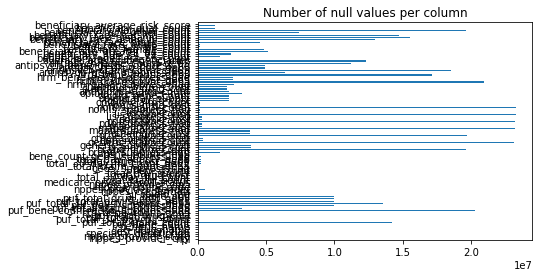

In [44]:
df_all.isnull().sum().plot(kind='barh');         # visually
plt.title('Number of null values per column');

In [45]:
# Explore frequency for medical specialties among providers with non-null values for bene_count 
# - used option_context to view all rows without permanently changing the setting
with pd.option_context('display.max_columns', None):
    print df_all.head()

          npi nppes_provider_city nppes_provider_state specialty_description  \
0  1912175340   SAN JUAN BAUTISTA                   CA       General Surgery   
1  1912175340   SAN JUAN BAUTISTA                   CA       General Surgery   
2  1912175340   SAN JUAN BAUTISTA                   CA       General Surgery   
3  1417051921             CATOOSA                   OK   Physician Assistant   
4  1417051921             CATOOSA                   OK   Physician Assistant   

  description_flag                  drug_name                generic_name  \
0                S  HYDROCODONE-ACETAMINOPHEN   HYDROCODONE/ACETAMINOPHEN   
1                S                  IBUPROFEN                   IBUPROFEN   
2                S         METOCLOPRAMIDE HCL          METOCLOPRAMIDE HCL   
3                S      ACETAMINOPHEN-CODEINE  ACETAMINOPHEN WITH CODEINE   
4                S               AZITHROMYCIN                AZITHROMYCIN   

   puf_bene_count  puf_total_claim_count  puf_total_30_d